# Image Classification-CNN

## 1 Setup and Load Data  
### 1.1 Install Dependencies and setup

In [29]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt

In [ ]:
# GPUs = tf.config.experimental.list_physical_devices("CPu")
# for gpu in GPUs:
    # tf.config.experimental.set_memory_growth(gpu, True)                                          For Avoid OOM errors

### 1.2 Remove dodgy images     
    --> The images are may be corrupted or wrong extension so it rid of all things.

In [ ]:
# pip install standard-imghdr

In [10]:
import cv2
import imghdr       #Used for check the extension of the images.

In [11]:
data_dir = "Data"

In [16]:
# os.listdir(os.path.join(data_dir,"Happy"))

In [13]:
images_extensions = ["jpeg", "jpg", "bmp", "png"]

In [17]:
for image_class in os.listdir(data_dir):
    print(image_class)

Happy
Sad


In [21]:
for image_class in os.listdir(data_dir):
    for img in os.listdir(os.path.join(data_dir, image_class)):
        print(img)
        break

-and-making-cheerful-gestures-at-the-camera-positive-human-facial-exp-W3KFFR.jpg
-trying-control-herself-her-emotions-showing-her-annoyance-anger_273609-7602.jpg


In [22]:
for image_class in os.listdir(data_dir):
    for img in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, img)
        print(image_path)
        break

Data\Happy\-and-making-cheerful-gestures-at-the-camera-positive-human-facial-exp-W3KFFR.jpg
Data\Sad\-trying-control-herself-her-emotions-showing-her-annoyance-anger_273609-7602.jpg


In [40]:
img = cv2.imread(os.path.join("Data", "Happy", "HappyPhoto.jpg"))       # Read Image as BGR format
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(2443, 3664, 3)


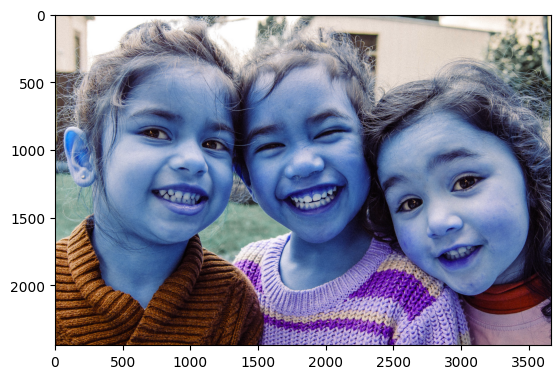

In [41]:
plt.imshow(img)
plt.show()

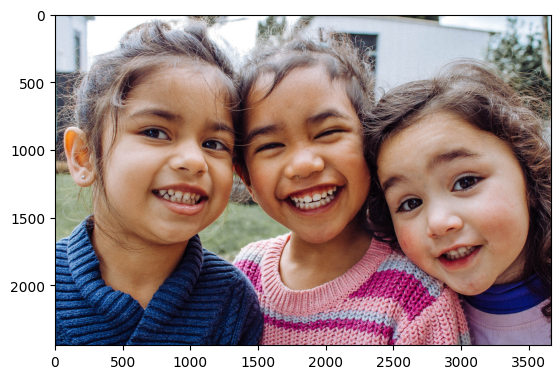

In [42]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))            ### Convert BGR format into RGB format
plt.show()

In [36]:
for image_class in os.listdir(data_dir):
    for img in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, img)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in images_extensions:
                print(f"Image not in exist list {image_path}")
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {image_path}")

Image not in exist list Data\Happy\depositphotos_12866006-stock-photo-happy-young-woman-showing-thumbs.jpg
Image not in exist list Data\Happy\depositphotos_374111884-stock-photo-cute-happy-face-close-face.jpg
Image not in exist list Data\Happy\happy-home.jpg
Image not in exist list Data\Happy\mental-health-woman.webp
Image not in exist list Data\Happy\smiling-affects-people.jpg
Image not in exist list Data\Sad\black-dude-crying-take-it-slow-gng.gif
Image not in exist list Data\Sad\depositphotos_115174482-stock-photo-side-view-of-beautiful-model.jpg
Image not in exist list Data\Sad\Sad-Face-Filter-by-EraseID-Change-Expression-feature-1200x675.webp
Image not in exist list Data\Sad\Sad.jpg


### 1.3 Load Data

In [ ]:
tf.data.Dataset??  ## Question mark gives the documentation of the method.

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [48]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    ve

In [110]:
data = tf.keras.utils.image_dataset_from_directory("Data")   # Builds image dataset We don't need to build labels or classes and do bunch of preprocesing 
                                                            # like resize the images (256,256).

Found 154 files belonging to 2 classes.


In [56]:
# data[0]

In [57]:
data_iterator = data.as_numpy_iterator()

In [ ]:
## Get another batch from iterator.
batch = data_iterator.next()
len(batch)  # 1- Images, 2-Labels.

2

In [73]:
batch[0].shape
#Output:
# (32, 256, 256, 3)---> 32-Batch_Size, 256,256-Image size, 3-COlor channels [We can also change the batch size and resize image size].

(32, 256, 256, 3)

In [74]:
batch[1]        #labels

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0])

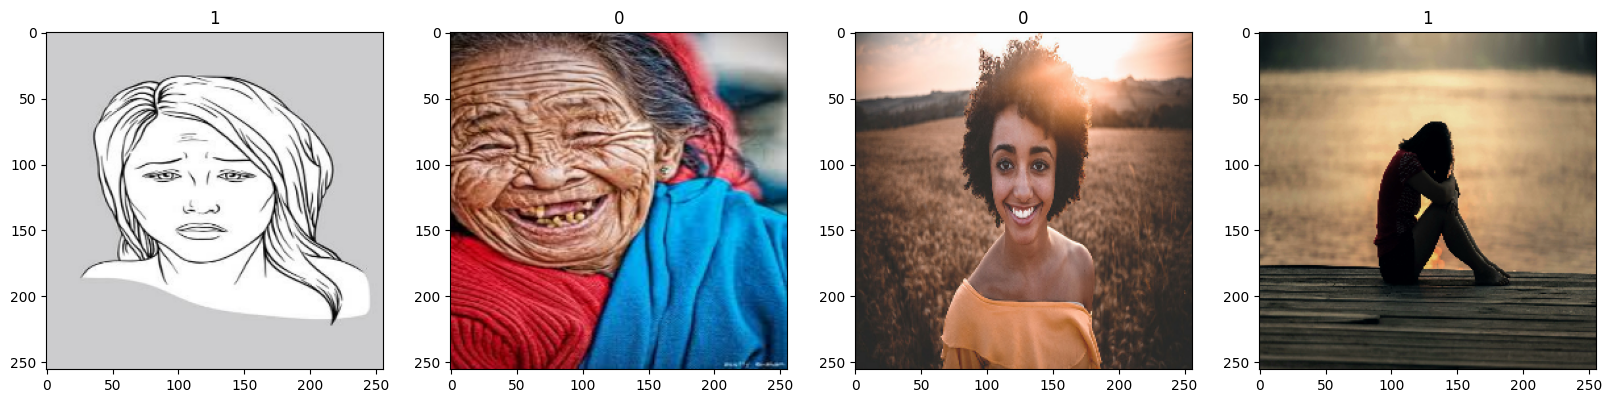

In [75]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))

for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


# class 0 = HAPPY PEOPLE
# class 1 = SAD PEOPLE

## 2. Preprocess Data    
### 2.1 Scale Data

In [111]:
data = data.map(lambda x,y:(x/255, y))

In [112]:
scale_iterator = data.as_numpy_iterator()


In [115]:
batch = scale_iterator.next()

In [116]:
batch[0].max()

1.0

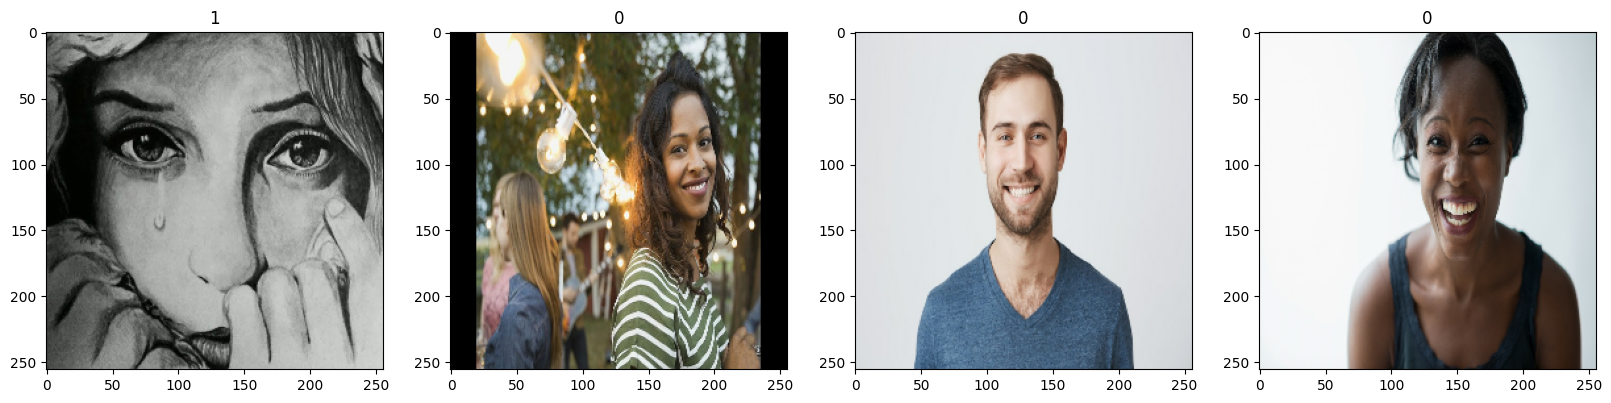

In [146]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))

for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])



### 2.2 Split Data

In [117]:
len(data)

5

In [136]:
train_size = int(len(data)*.5)+1
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [137]:
train_size

3

In [138]:
val_size

1

In [139]:
test_size

1

In [140]:
train_size+test_size+val_size

5

In [141]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

3

## 3. Deep Learning Model                
### 3.1 Building DL Model

In [147]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [160]:
model = Sequential()

In [161]:
### Model Architecture

model.add(Conv2D(16, (3,3), 1, activation="relu", input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [218]:
model.compile("adam", loss=tf.losses.BinaryCrossentropy() , metrics=["accuracy"])

In [165]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

### 3.2 Train the model

In [166]:
log_dir = "logs"

In [167]:
tensorboard_callback  = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [169]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 570ms/step - accuracy: 0.5039 - loss: 0.7699 - val_accuracy: 0.5625 - val_loss: 0.6895
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 622ms/step - accuracy: 0.5169 - loss: 0.6902 - val_accuracy: 0.5625 - val_loss: 0.6778
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 544ms/step - accuracy: 0.5859 - loss: 0.6690 - val_accuracy: 0.7812 - val_loss: 0.6456
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 615ms/step - accuracy: 0.7695 - loss: 0.6319 - val_accuracy: 0.5938 - val_loss: 0.6048
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 6s/step - accuracy: 0.5664 - loss: 0.7374 - val_accuracy: 0.8750 - val_loss: 0.5521
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.7773 - loss: 0.5739 - val_accuracy: 0.9375 - val_loss: 0.5241
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 687ms/step - accuracy: 0.8359 - loss: 0.5322 - val_accuracy: 0.8125 - val_loss: 0.4820
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 505ms/step - accuracy: 0.7930 - loss: 0.4675 - val_accuracy: 0.7500 - val_loss: 0.4

In [171]:
hist.history

{'accuracy': [0.5,
  0.5416666865348816,
  0.625,
  0.78125,
  0.65625,
  0.78125,
  0.84375,
  0.8125,
  0.7916666865348816,
  0.8541666865348816,
  0.8958333134651184,
  0.9479166865348816,
  0.9791666865348816,
  1.0,
  0.9895833134651184,
  1.0,
  0.9895833134651184,
  0.9895833134651184,
  1.0,
  1.0],
 'loss': [0.7452887892723083,
  0.6878897547721863,
  0.6683277487754822,
  0.6205726265907288,
  0.6763448119163513,
  0.5688074827194214,
  0.5233864784240723,
  0.4569576680660248,
  0.40382716059684753,
  0.34024930000305176,
  0.28614768385887146,
  0.203047513961792,
  0.1464829295873642,
  0.09577486664056778,
  0.05858572944998741,
  0.03624061867594719,
  0.04011649265885353,
  0.026304712519049644,
  0.0111231142655015,
  0.004575442988425493],
 'val_accuracy': [0.5625,
  0.5625,
  0.78125,
  0.59375,
  0.875,
  0.9375,
  0.8125,
  0.75,
  0.84375,
  0.9375,
  0.96875,
  1.0,
  0.96875,
  0.96875,
  1.0,
  1.0,
  0.96875,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.6895160675048

### 3.3 Plot Performance:

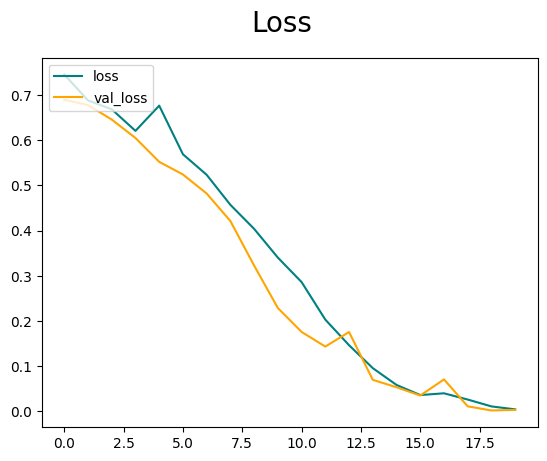

In [172]:
fig = plt.figure()

plt.plot(hist.history["loss"], color = "teal", label = "loss")
plt.plot(hist.history["val_loss"], color = "orange", label = "val_loss")
plt.suptitle("Loss", fontsize = 20)
plt.legend(loc="upper left")
plt.show()

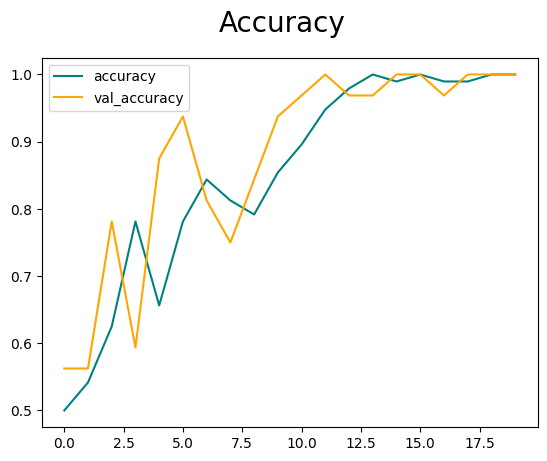

In [173]:
plt.plot(hist.history["accuracy"], color = "teal", label = "accuracy")
plt.plot(hist.history["val_accuracy"], color = "orange", label = "val_accuracy")
plt.suptitle("Accuracy", fontsize = 20)
plt.legend(loc="upper left")
plt.show()

## 4 Evaluate Performance              
### 4.1 Evaluate

In [174]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pre = Precision()
rec = Recall()
acc = BinaryAccuracy()

In [175]:
len(test)

1

In [177]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    rec.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


In [183]:
print(f"Precision: {pre.result().numpy()}\nRecall: {rec.result().numpy()}\nAccuracy: {acc.result().numpy()}")

Precision: 1.0
Recall: 1.0
Accuracy: 1.0


### 4.2 Test

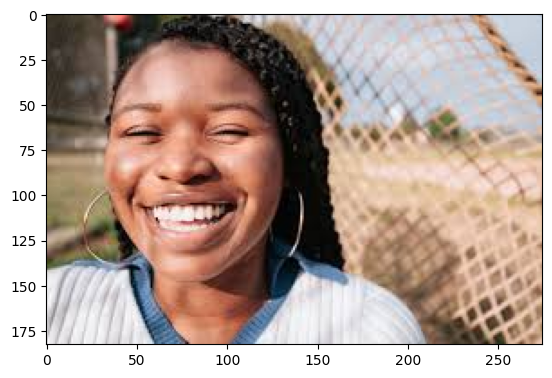

In [188]:
import cv2

img = cv2.imread("happytest.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

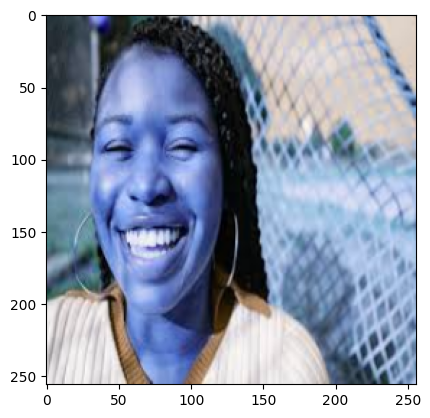

In [197]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [198]:
resize.shape

TensorShape([256, 256, 3])

In [ ]:
np.expand_dims(resize, 0).shape   #Encapsulate the array.

(1, 256, 256, 3)

In [200]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


In [201]:
yhat

array([[0.00101561]], dtype=float32)

In [202]:
if yhat>0.5:
    print("The predicted class is Sad!")
else:
    print("The predicted the class is Happy")

The predicted the class is Happy


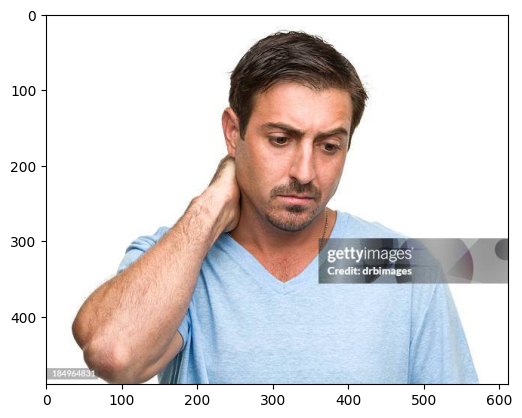

In [204]:
img = cv2.imread("sadtest.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

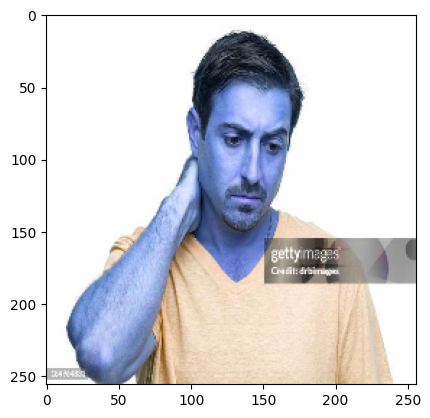

In [208]:
## Resize the Image

resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [209]:
yhat = model.predict(np.expand_dims(resize/255,0 ))
yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([[0.90893537]], dtype=float32)

In [210]:
if yhat>0.5:
    print("The predicted class is Sad!")
else:
    print("The predicted the class is Happy")

The predicted class is Sad!


## 5 Save the Model.

In [216]:
from tensorflow.keras.models import load_model

In [221]:
os.path.join("model", "HappySad.keras")

'model\\HappySad.keras'

In [219]:
model.save(os.path.join("model", "HappySad.keras"))

In [222]:
new_model = load_model(os.path.join("model", "HappySad.keras"))

c:\Users\Arockia anand raj\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [224]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


array([[0.90893537]], dtype=float32)

In [225]:
if yhat>0.5:
    print("The predicted class is Sad!")
else:
    print("The predicted the class is Happy")

The predicted class is Sad!
